In [1]:
from Functions_thesis import *
from Functions_plotting import *

one_node = True

G = range(5)
T = range(24)

if one_node==True:
    N = range(1)
else:
    N = range(5)

LG = len(G)
LT = len(T)
LN = len(N)

P_D_case5 = np.array([0, 400, 300, 400, 0])
tot_P_D = sum(P_D_case5)
maxdemand = 2951.750249

cost_G = np.array([14,15,30,40,10])
cost_G = cost_G * 6.9
P_G = np.array([40,170,520,200,600])
P_G = P_G/tot_P_D * maxdemand

print(f"PG {P_G}")

sus = np.zeros((LN,LN))
P_F = np.zeros((LN,LN))

if one_node==False:
    sus[0,1] = 0.06727
    sus[1,0] = 0.06727
    sus[0,3] = 0.06218
    sus[3,0] = 0.06218
    sus[0,4] = 0.29537
    sus[4,0] = 0.29537
    sus[1,2] = 0.17503
    sus[2,1] = 0.17503
    sus[2,3] = 0.06364
    sus[3,2] = 0.06364
    sus[3,4] = 0.06364
    sus[4,3] = 0.06364

    P_F[0,1] = 400
    P_F[1,0] = 400
    P_F[0,3] = 1000
    P_F[3,0] = 1000
    P_F[0,4] = 1000
    P_F[4,0] = 1000
    P_F[1,2] = 1000
    P_F[2,1] = 1000
    P_F[2,3] = 1000
    P_F[3,2] = 1000
    P_F[3,4] = 240
    P_F[4,3] = 240
    P_F = P_F/tot_P_D * maxdemand
    GN = {0: [0, 1], 1: [], 2: [2], 3: [3],  4: [4]}
    NN = {0: [1,3,4], 1: [0,2], 2: [1,3], 3: [0,2,4], 4: [0,3]}
    DN = {0: [0], 1: [1], 2: [2], 3: [3], 4: [4]}
    NG = {0: 0, 1: 0, 2: 2, 3: 3, 4: 4} 
    WN = 1
    P_W = 200/tot_P_D * maxdemand
    DemandFractions = P_D_case5/tot_P_D
else:
    sus[0,0] = 0
    P_F[0,0] = 0
    WN = 0
    P_W = 200/tot_P_D * maxdemand
    GN = {0: [0,1,2,3,4]}
    NN = {0: []}
    DN = {0: [0]}
    NG = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0} 
    DemandFractions = np.array([1])

print(f"PW {P_W}")

variables = ['p_G','theta']
Target = ['P_D','windpower']

parameters = {'cost_G': cost_G, 'P_G': P_G, 'DemandFractions': DemandFractions,'sus': sus, 'P_F': P_F, 'P_W': P_W,'GN':GN, 'DN':DN}
config = EDP('EDP',G,T,N,NN,NG,WN,parameters,variables,Target)

data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl', config, 0.8, parameters, False)
features = ['ForecastDAOnshore_Wind_DK2','GridLossDistributionMWh_DK2_Lag','Total_consumption_DK2_Lag']
# features = ['ForecastDAOnshore_Wind_DK2','GridLossDistributionMWh_DK2_Lag','GrossConsumptionMWh_DK1_Lag','GrossConsumptionMWh_DK2_Lag','Net_consumption_DK1_Lag','Net_consumption_DK2_Lag','Total_consumption_DK1_Lag','Total_consumption_DK2_Lag']
Target = ['P_D_N' + str(n) for n in config.N]
config.Target = Target
non_features = Target + ["timestamp", "date", "ID", "hour"]

PG [ 107.33637269  456.17958394 1395.37284498  536.68186345 1610.04559036]
PW 536.6818634545455
Number of training samples: 790
Number of test samples: 198


Mean of Train Data: 1384.728818161446
Mean of Test Data: 1431.7682452887432
std of Train Data: 289.84727394996327
std of Test Data: 297.62262552512004


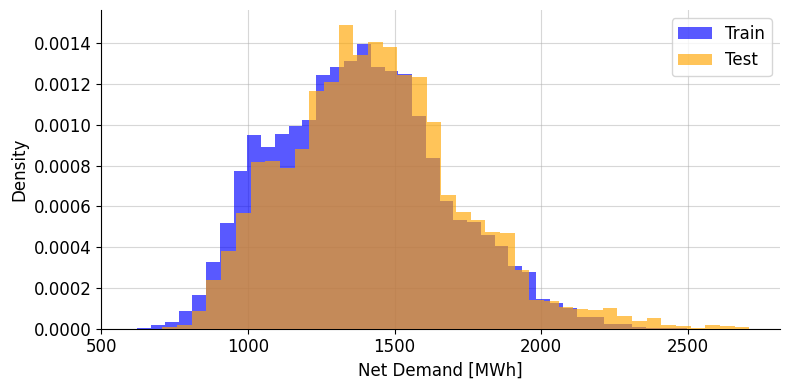

Wasserstein Distance between Training and Testing Sets: 47.03942712729706


In [2]:
# Assuming data preparation is done earlier
data['year'] = data.timestamp.dt.year
df_train = data[data['ID'].isin(train_ID)]
df_test = data[data['ID'].isin(test_ID)]

# Variable to plot
var = 'P_D_N0'

# Scaling data based on variable
if var == 'DA_DK2':
    train_data = df_train[var] * config.DA_scaler
    test_data = df_test[var] * config.DA_scaler
else:
    train_data = df_train[var] * config.scaler
    test_data = df_test[var] * config.scaler


# Calculate the mean of train_data and test_data
mean_train = np.mean(train_data)
mean_test = np.mean(test_data)

print(f"Mean of Train Data: {mean_train}")
print(f"Mean of Test Data: {mean_test}")

std_train = np.std(train_data)
std_test = np.std(test_data)

print(f"std of Train Data: {std_train}")
print(f"std of Test Data: {std_test}")

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))  # Increased figure size for better visibility

# Normalize the histograms to show density
bins = 40  # Increase number of bins for more detail
ax.hist(train_data, bins=bins, density=True, alpha=0.65, label='Train', color='blue',zorder=5)
ax.hist(test_data, bins=bins, density=True, alpha=0.65, label='Test', color='orange',zorder=10)

# ax.axvline(mean_train, color='blue', linestyle='dashed', linewidth=2, label=f'Train Mean: {mean_train:.2f}', zorder=15)
# ax.axvline(mean_test, color='orange', linestyle='dashed', linewidth=2, label=f'Test Mean: {mean_test:.2f}', zorder=15)


# Set x-axis labels based on the variable
if var == "DA_DK2":
    ax.set_xlabel("Spot price [DKK/MWh]", fontsize=12)
elif var == "windpower":
    ax.set_xlabel("Wind production [MWh]", fontsize=12)
else:
    ax.set_xlabel("Net Demand [MWh]", fontsize=12)

ax.set_ylabel('Density', fontsize=12)
ax.legend()

# Add grid lines for better readability
ax.grid(True, which='both', alpha=0.5,zorder=-2)
ax.set_xticks([500, 1000, 1500, 2000, 2500])  # Set the desired x-ticks

# ax.tick_params(axis='both', which='major', labelsize=11, length=8)  # Major ticks
# ax.tick_params(axis='both', which='minor', labelsize=11, length=5)  # Minor ticks (optional)

# Hide the top and right spines for a cleaner look
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Set a white background
fig.set_facecolor(color='white')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
fig.savefig(f"Plots/{var}_dist.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


from scipy.stats import wasserstein_distance

distance = wasserstein_distance(test_data,train_data)
print(f"Wasserstein Distance between Training and Testing Sets: {distance}")

In [ ]:
data['P_D_N0'].min()*config.base_scaler

In [ ]:
regularisation = ['Ridge',1, 0.1]
gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles = spo_framework_v2(config,data,IDS,train_ID,test_ID,features,plot_res=True,regularisation=regularisation)

In [ ]:
plt.plot(predictions_spo['Target'][0])

In [ ]:
plt.plot(B)

In [ ]:
boxplot_spo_loss(sample_loss,infeasibles,outliers=True)

In [ ]:
plt.plot(B@config.x_test[0])
plt.plot(predictions_spo['SPO - Ridge - 1'][0])
plt.plot(predictions_spo['Target'][0])
# plt.plot(predictions_spo['SPO - Lasso - 0.1 - mod'][0])

In [ ]:
plt.plot(B[LN*LT:,:]@config.x_test[0])

In [ ]:
train_ID_sets = [10,20,50,75]
test_ID_set = len(test_ID)
gap = 5
traintest_gen_losses, traintest_losses, traintest_count_infeasibles = train_test_experiment(config, data, IDS, train_ID_sets, test_ID_set, gap, features, regu = regularisation, plot = True)

In [ ]:
loss_boxplot_experiment(traintest_losses,traintest_count_infeasibles,train_ID_sets,"Train size",outliers=False)

In [13]:
new_traintest_losses = {10: {'SPO - Ridge - 1': traintest_losses[10]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': traintest_losses[10]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': traintest_losses[10]['LR_seq'],
                       'Ridge_seq': traintest_losses[10]['Ridge_seq'],
                       'Lasso_seq': traintest_losses[10]['Lasso_seq'],
                       'DT_seq': traintest_losses[10]['DT_seq'],
                       'RF_seq': traintest_losses[10]['RF_seq']}, 
                       20:  {'SPO - Ridge - 1': traintest_losses[20]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': traintest_losses[20]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': traintest_losses[20]['LR_seq'],
                       'Ridge_seq': traintest_losses[20]['Ridge_seq'],
                       'Lasso_seq': traintest_losses[20]['Lasso_seq'],
                       'DT_seq': traintest_losses[20]['DT_seq'],
                       'RF_seq': traintest_losses[20]['RF_seq']},
                       50: {'SPO - Ridge - 1': traintest_losses[50]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': traintest_losses[50]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': traintest_losses[50]['LR_seq'],
                       'Ridge_seq': traintest_losses[50]['Ridge_seq'],
                       'Lasso_seq': traintest_losses[50]['Lasso_seq'],
                       'DT_seq': traintest_losses[50]['DT_seq'],
                       'RF_seq': traintest_losses[50]['RF_seq']},
                       75: {'SPO - Ridge - 1': traintest_losses[75]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': traintest_losses[75]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': traintest_losses[75]['LR_seq'],
                       'Ridge_seq': traintest_losses[75]['Ridge_seq'],
                       'Lasso_seq': traintest_losses[75]['Lasso_seq'],
                       'DT_seq': traintest_losses[75]['DT_seq'],
                       'RF_seq': traintest_losses[75]['RF_seq']}}

In [ ]:
loss_boxplot_experiment(new_traintest_losses,traintest_count_infeasibles,train_ID_sets,"Train size", False)

In [ ]:
noise_levels = [0,0.1,0.3,0.5]
noise_target = 'Features'
noise_data = 'train'
noise_gen_loss, noise_losses, noise_count_infeasibles = noise_experiment(config, data, IDS, train_ID, test_ID, features, Target, noise_levels, noise_target, noise_data, True, regularisation)

In [ ]:
loss_boxplot_experiment(noise_losses,noise_count_infeasibles,noise_levels,"Noise level",False,None)

In [ ]:
poly_gen_losses, poly_losses, poly_count_infeasibles = polynomial_degree_experiment(config,features,parameters,[1,2,3,5],True,regularisation)

In [ ]:
new_poly_losses = {1: {'SPO - Ridge - 1': poly_losses[1]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': poly_losses[1]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': poly_losses[1]['LR_seq'],
                       'Ridge_seq': poly_losses[1]['Ridge_seq'],
                       'Lasso_seq': poly_losses[1]['Lasso_seq'],
                       'DT_seq': poly_losses[1]['DT_seq'],
                       'RF_seq': poly_losses[1]['RF_seq']}, 
                       2:  {'SPO - Ridge - 1': poly_losses[2]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': poly_losses[2]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': poly_losses[2]['LR_seq'],
                       'Ridge_seq': poly_losses[2]['Ridge_seq'],
                       'Lasso_seq': poly_losses[2]['Lasso_seq'],
                       'DT_seq': poly_losses[2]['DT_seq'],
                       'RF_seq': poly_losses[2]['RF_seq']},
                       3: {'SPO - Ridge - 1': poly_losses[3]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': poly_losses[3]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': poly_losses[3]['LR_seq'],
                       'Ridge_seq': poly_losses[3]['Ridge_seq'],
                       'Lasso_seq': poly_losses[3]['Lasso_seq'],
                       'DT_seq': poly_losses[3]['DT_seq'],
                       'RF_seq': poly_losses[3]['RF_seq']},
                       5: {'SPO - Ridge - 1': poly_losses[5]['SPO - Ridge - 1'], 
                       'SPO - Ridge - 1 - mod': poly_losses[5]['SPO - Ridge - 1 - mod'], 
                       'LR_seq': poly_losses[5]['LR_seq'],
                       'Ridge_seq': poly_losses[5]['Ridge_seq'],
                       'Lasso_seq': poly_losses[5]['Lasso_seq'],
                       'DT_seq': poly_losses[5]['DT_seq'],
                       'RF_seq': poly_losses[5]['RF_seq']}}

In [ ]:
loss_boxplot_experiment(new_poly_losses,poly_count_infeasibles,[1,2,3,5],"Polynomial Degree")

In [ ]:
dataset = dataset_creator(config,data,IDS,features)
s = 1
# datatest = data[data['ID'] == s]
# ctest = dataset[s]['cost_vector']
# ztest = dataset[s]['z']
# wtest = dataset[s]['w']
# dualtest = dataset[s]['constraints_dual']
# ctest = dataset[s]['cost_vector']
# ztest = dataset[s]['z']

model = 'SPO - Ridge - 1 - mod'
modeltype = 'SPO'

ctest = predictions_spo[model][s]
wtest = w_prediction[model][s]
dualtest = dual_prediction[model][s]
PDtest = np.zeros((LN,LT))
PGtest = np.zeros((LT,LG))
PFtest = np.zeros((config.LL,LT))
lambdatest = np.zeros((LN,LT))
muGtest = np.zeros((LT,LG))
muFtest = np.zeros((config.LL,LT))
pgtest = np.zeros((LT,LG)) 
thetatest = np.zeros((LN,LT))
flowtest = np.zeros((config.LL,LT))
for n in N:
    if modeltype == 'SPO':
        PDtest[n] = - predictions_spo[model][s][n*LT:(n+1)*LT]
    else:
        PDtest[n] = predictions_sequential[model][f"P_D_N{n}"][s]
    lambdatest[n] = wtest[n*LT:(n+1)*LT]
    thetatest[n] -= dualtest[LT*LG+n*LT:LT*LG+(n+1)*LT]
    thetatest[n] += dualtest[LT*LG+LN*LT+n*LT:LT*LG+LN*LT+(n+1)*LT]
for t in T:
    if modeltype == 'SPO':
        PGtest[t] = predictions_spo[model][s][LN*LT+t*LG:LN*LT+(t+1)*LG]
    else:
        PGtest[t] = config.PG
    muGtest[t] = wtest[LN*LT+t*LG:LN*LT+(t+1)*LG]
    pgtest[t] = dualtest[t*LG:(t+1)*LG]
for l in config.L:
    if modeltype == 'SPO':
        PFtest[l] = predictions_spo[model][s][LN*LT+LT*LG+l*LT:LN*LT+LT*LG+(l+1)*LT]
    else:
        PFtest[l] = [config.P_F[config.TransmissionLines[l][0],config.TransmissionLines[l][1]] for t in T]
    muFtest[l] = wtest[LN*LT+LT*LG+l*LT:LN*LT+LT*LG+(l+1)*LT]
    n = config.TransmissionLines[l][0]
    m = config.TransmissionLines[l][1]
    for t in T:
        flowtest[l,t] = config.sus[n,m] * (thetatest[n,t] - thetatest[m,t])

t = 1
print("Hour: ",t)
print()
for n in N:
    print("Node ",n)
    print()
    print("Demand: ",PDtest[n,t])
    for g in GN[n]:
        print("Max Production for generator ", g,": ",PGtest[t,g])
        print("Production for generator ", g,": ",pgtest[t,g])
    for m in NN[n]:
        for l in config.L:
            if config.TransmissionLines[l][0] == n and config.TransmissionLines[l][1] == m:
                print("Flow from ", n," to ",m,": ",flowtest[l,t])
    print("EL-Price: ",lambdatest[n,t])
    print()

In [16]:
def results_EDP_v2(config,test_ID,model_names,w_prediction,dual_prediction,predictions_spo,predictions_sequential):
    LN = config.LN
    LT = config.LT
    LG = config.LG
    LL = config.LL
    N = config.N
    T = config.T
    L = config.L
    n_samples = len(test_ID)

    PDtest_dict = {}
    PGtest_dict = {}
    PFtest_dict = {}
    lambdatest_dict = {}
    muGtest_dict = {}
    muFtest_dict = {}
    pgtest_dict = {}
    thetatest_dict = {}
    flowtest_dict = {}

    modeltypes = ['SPO' for i in range(len(predictions_spo))] + ['seq' for i in range(len(predictions_sequential))]

    for i, model in enumerate(model_names):
        PDtest = np.zeros((n_samples,LN,LT))
        PGtest = np.zeros((n_samples,LT,LG))
        PFtest = np.zeros((n_samples,LL,LT))
        lambdatest = np.zeros((n_samples,LN,LT))
        muGtest = np.zeros((n_samples,LT,LG))
        muFtest = np.zeros((n_samples,LL,LT))
        pgtest = np.zeros((n_samples,LT,LG)) 
        thetatest = np.zeros((n_samples,LN,LT))
        flowtest = np.zeros((n_samples,LL,LT))
        for s in range(n_samples):
            for n in N:
                if modeltypes[i] == 'SPO':
                    PDtest[s,n] = - predictions_spo[model][s][n*LT:(n+1)*LT]
                elif modeltypes[i] == 'seq':
                    PDtest[s,n] = predictions_sequential[model][f"P_D_N{n}"][s]
                lambdatest[s,n] = w_prediction[model][s][n*LT:(n+1)*LT]
                thetatest[s,n] -= dual_prediction[model][s][LT*LG+n*LT:LT*LG+(n+1)*LT]
                thetatest[s,n] += dual_prediction[model][s][LT*LG+LN*LT+n*LT:LT*LG+LN*LT+(n+1)*LT]
            for t in T:
                if modeltypes[i] == 'SPO':
                    PGtest[s,t] = predictions_spo[model][s][LN*LT+t*LG:LN*LT+(t+1)*LG]
                elif modeltypes[i] == 'seq':
                    PGtest[s,t] = config.P_G
                muGtest[s,t] = w_prediction[model][s][LN*LT+t*LG:LN*LT+(t+1)*LG]
                pgtest[s,t] = dual_prediction[model][s][t*LG:(t+1)*LG]
            for l in L:
                if modeltypes[i] == 'SPO':
                    PFtest[s,l] = predictions_spo[model][s][LN*LT+LT*LG+l*LT:LN*LT+LT*LG+(l+1)*LT]
                elif modeltypes[i] == 'seq':
                    PFtest[s,l] = [config.P_F[config.TransmissionLines[l][0],config.TransmissionLines[l][1]] for t in T]
                muFtest[s,l] = w_prediction[model][s][LN*LT+LT*LG+l*LT:LN*LT+LT*LG+(l+1)*LT]
                n = config.TransmissionLines[l][0]
                m = config.TransmissionLines[l][1]
                for t in T:
                    flowtest[s,l,t] = config.sus[n,m] * (thetatest[s,n,t] - thetatest[s,m,t])
        PDtest_dict[model] = PDtest
        PGtest_dict[model] = PGtest
        PFtest_dict[model] = PFtest
        lambdatest_dict[model] = lambdatest
        muGtest_dict[model] = muGtest
        muFtest_dict[model] = muFtest
        pgtest_dict[model] = pgtest
        thetatest_dict[model] = thetatest
        flowtest_dict[model] = flowtest
    return PDtest_dict,PGtest_dict,PFtest_dict,lambdatest_dict,muGtest_dict,muFtest_dict,pgtest_dict,thetatest_dict,flowtest_dict

In [5]:
modeltypes = ['SPO' for i in range(len(predictions_spo))] + ['seq' for i in range(len(predictions_sequential))]

In [ ]:
w_prediction.keys()

In [ ]:
predictions_spo.keys()

In [17]:
PDtest_dict,PGtest_dict,PFtest_dict,lambdatest_dict,muGtest_dict,muFtest_dict,pgtest_dict,thetatest_dict,flowtest_dict = results_EDP_v2(config,test_ID,w_prediction.keys(),w_prediction,dual_prediction,predictions_spo,predictions_sequential)

In [ ]:
w_prediction.keys()

In [ ]:
model_names = ['SPO - Ridge - 1','SPO - Ridge - 1 - mod','Target']
s = 9
for i in model_names:
    plt.plot(PDtest_dict[i][s,0],label=i)
plt.legend()

In [ ]:
sample_loss['SPO - Ridge - 1']-sample_loss['SPO - Ridge - 1 - mod']

In [ ]:
plt.plot(sample_loss['SPO - Ridge - 1'], label = 'orig')
plt.plot(sample_loss['SPO - Ridge - 1 - mod'], label = 'mod')
plt.legend()

In [ ]:
sample_loss['SPO - Ridge - 1'][9]
sample_loss['SPO - Ridge - 1 - mod'][9]

In [ ]:
s = 0
g = 4
plt.plot(PGtest_dict['SPO - Ridge - 1'][s][:,g],label="PG orig")
plt.plot(PGtest_dict['SPO - Ridge - 1 - mod'][s][:,g],label="PG mod")
plt.plot(pgtest_dict['SPO - Ridge - 1'][s][:,g],label="pg orig")
plt.plot(pgtest_dict['SPO - Ridge - 1 - mod'][s][:,g],label="pg mod")
plt.plot(muGtest_dict['SPO - Ridge - 1'][s][:,g],label="mug orig")
plt.plot(muGtest_dict['SPO - Ridge - 1 - mod'][s][:,g],label="mug mod")
plt.legend()

In [ ]:
s = 40
model_names = ['SPO - Lasso - 0.1']
g = 0
for i in model_names:
    plt.plot(PGtest_dict['Target'][s,:,g],label=f"target_PG{g}")
    plt.plot(PGtest_dict[i][s,:,g],label=f"{i}_PG{g}")
    plt.plot(pgtest_dict[i][s,:,g],label=f"{i}_pg{g}")
plt.legend()

In [ ]:
model_names = ['SPO - Lasso - 0.1 - mod']
for i in model_names:    
    plt.plot(lambdatest_dict[i][0],label=f"{i}_PG{g}")
plt.legend()

In [ ]:
config.P_F

In [ ]:
plt.plot(predictions_spo['SPO - Ridge - 0.5 - mod'][0])

In [ ]:
plt.plot(config.w_test[0])

In [33]:
dataset = dataset_creator(config,data,IDS,features)

Sequential model

In [34]:
regularisation = [0.5,0.1]
predictions_sequential,mse_sequential = sequential_models_v2(config,Target,data,train_ID,test_ID,features,regularisation)

EDP model

In [ ]:
idx=40
PD_true = np.array([dataset[test_ID[idx]][f'P_D_N{n}'] for n in N])
sample_true = EDP_standard_form(config,PD_true)
print(f"True obj. {sample_true['z']*config.scaler}")

PD_pred = np.array([predictions_sequential['LR_seq'][f'P_D_N{n}'][idx] for n in N])
sample_pred = EDP_standard_form(config,PD_pred)
print(f"True obj. {sample_pred['z']*config.scaler}")


print(sum(sum(sample_true['p'][g]*cost_G[g] for g in G))*config.scaler)
print(sum(sum(sample_pred['p'][g]*cost_G[g] for g in G))*config.scaler)

plt.plot(PD_true[1])
plt.plot(PD_pred[1])

print("true dual prob - i.e. decision based z")
z_true = -sum(sum(sample_true['lambda'][n,t] * PD_true[d,t] for n in N for d in DN[n]) - sum(sample_true['muG'][g,t] * config.P_G[g] for g in G) - sum(sample_true['muF'][n,m,t] * config.P_F[n,m] for n in N for m in NN[n]) for t in T)*config.scaler
print(z_true)

print("pred dual prob - i.e. decision based z")
z_realised = -sum(sum(sample_pred['lambda'][n,t] * PD_true[d,t] for n in N for d in DN[n]) - sum(sample_pred['muG'][g,t] * config.P_G[g] for g in G) - sum(sample_pred['muF'][n,m,t] * config.P_F[n,m] for n in N for m in NN[n]) for t in T)*config.scaler
print(z_realised)

print("SPO loss")
print(z_realised-z_true)

In [ ]:
plt.plot(sample_pred['lambda'].flatten())

In [ ]:
dataset[test_ID[idx]]['constraints_dual'][5*24:].shape

In [ ]:
#For n == 1
np.hstack((sample_true['lambda'][0],sample_true['muG'].T.flatten()))

In [ ]:
plt.plot(dataset[test_ID[idx]]['w'])

In [ ]:
sample_true['muG'].flatten()

In [ ]:
len(dataset[test_ID[idx]]['w'][240:])

In [ ]:
w = dataset[test_ID[idx]]['w'][240:]

#Første 120
sample_true['lambda'].flatten()
# Næste 120
sample_true['muG'].T.flatten()


In [ ]:
sample_true['muF'].shape

In [ ]:
dataset[0]['constraints_dual'].shape

In [80]:
muFtest = np.zeros((config.LL,LT))
for l in config.TransmissionLines:
    n = config.TransmissionLines[0]
    m = config.TransmissionLines[1]
    muFtest[l] = sample_true['muF'][n,m]

In [ ]:
muFtest[0]

In [ ]:
for n in N:
    for m in NN[n]:
        print("[",n,",",m,"]")

In [ ]:
sample_pred['sigma1']

In [ ]:
config.TransmissionLines

In [ ]:
dataset[test_ID[idx]]['w']

In [262]:
scenarios = train_ID
n_scenarios = len(scenarios)
prob = 1/n_scenarios

In [263]:
# For one node
PD_scenarios = []
for k in range(n_scenarios):
        PD_scenarios.append(np.array([dataset[k][f'P_D_N{n}'] for n in N]))

In [ ]:
for k in scenarios:
    plt.plot(PD_scenarios[k][0])

In [ ]:
#Problem
model_primal = gp.Model("Stochastic multihour nodal ED primal")
# model_primal.Params.LogToConsole = 0
p_primal=model_primal.addVars(G,T,vtype=GRB.CONTINUOUS,lb=0,name="Generator production")
theta_primal = model_primal.addVars(N,T,vtype=GRB.CONTINUOUS,lb=-GRB.INFINITY,name="voltage angle")
#Objective function
model_primal.setObjective(gp.quicksum(prob*gp.quicksum(cost_G[g] * p_primal[g,t] for g in G for t in T) for k in scenarios), sense=GRB.MINIMIZE)


#Capacity constraints:
balanceconstraints = model_primal.addConstrs((gp.quicksum(p_primal[g,t] for g in GN[n]) 
                                              - gp.quicksum(sus[n,m] * (theta_primal[n,t] 
                                            - theta_primal[m,t]) for m in NN[n]) 
                                            >= gp.quicksum(PD_scenarios[k][d,t] for d in DN[n]) for n in N for t in T for k in scenarios),name="Balance")

capacityconstraints = model_primal.addConstrs((-p_primal[g,t] >= -config.P_G[g] for g in G for t in T),name="Upper bound capacity")
transmissionconstraints = model_primal.addConstrs((-sus[n,m] * (theta_primal[n,t] - theta_primal[m,t]) >= -config.P_F[n,m] for n in N for m in NN[n] for t in T),name="transmission capacity")
thetazeroconstraints = model_primal.addConstrs((theta_primal[0,t] == 0 for t in T),name="theta0")

#Optimize
model_primal.optimize()

model_primal.write("test_primal.lp")

if model_primal.status == GRB.OPTIMAL:
    p_res_primal = np.zeros((len(G),len(T)))
    theta_res_primal = np.zeros((len(N),len(T)))
    muG_res_primal = np.zeros((len(G),len(T)))
    muF_res_primal = np.zeros((len(N),len(N),len(T)))
    lambda_res_primal = np.zeros((len(N),len(T)))
    sigma1_res_primal = np.zeros(len(T))
    flow_primal = np.zeros((LN,LN,LT))
    for t in T:
        sigma1_res_primal[t] = thetazeroconstraints[t].Pi
        for n in N:
            # lambda_res_primal[n,t] = balanceconstraints[n,t].Pi
            theta_res_primal[n,t] = theta_primal[n,t].x
            for m in NN[n]:
                muF_res_primal[n,m,t] = transmissionconstraints[n,m,t].Pi
                flow_primal[n,m,t] = sus[n,m]*(theta_res_primal[n,t] - theta_res_primal[m,t])
                flow_primal[m,n,t] = sus[m,n]*(theta_res_primal[m,t] - theta_res_primal[n,t])
        for g in G:
            p_res_primal[g,t]=p_primal[g,t].x
            muG_res_primal[g,t] = capacityconstraints[g,t].Pi
    obj_multihourED_primal = model_primal.ObjVal
    print()
    print("Optimal solution found:")
    print(f"Total cost: {obj_multihourED_primal:.2f} DKK")
else:
    print("Infeasible")

In [ ]:
# 

In [14]:
PD_scenarios = []
for i in range(len(train_ID)):
    PD_scenarios.append(config.dataset[i]['DA_DK2'])
